### Exercise 5 - BLOB Analysis (connected component analysis and object classification)

In [109]:
from skimage import io, color, morphology
import skimage
from skimage.util import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.filters import threshold_otsu
from skimage import segmentation
from skimage import measure
from skimage.color import label2rgb
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 

In [46]:
def show_comparison(original, modified, modified_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(modified)
    ax2.set_title(modified_name)
    ax2.axis('off')
    io.show()

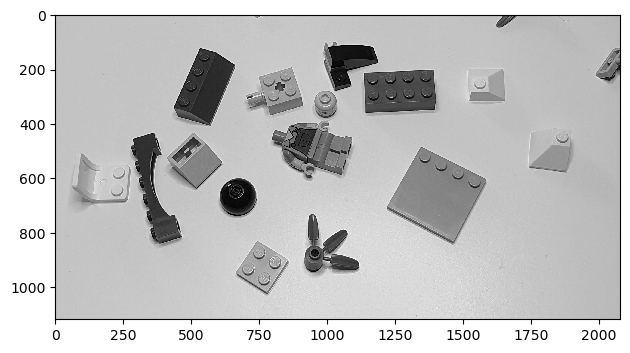

In [38]:
in_dir = "data/"

# X-ray image
im_name = "lego_4_small.png"

im_org = io.imread(in_dir + im_name, as_gray = True)

io.imshow(im_org)

In [39]:
threshold_otsu(im_org)

0.5444677734375001

In [40]:
img_temp = np.array([0 if p > 0.5444677734375001 else 1 for p in im_org.reshape(im_org.shape[0]*im_org.shape[1])]).reshape(im_org.shape)

/Users/amirbouslama/anaconda3/envs/course02502/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


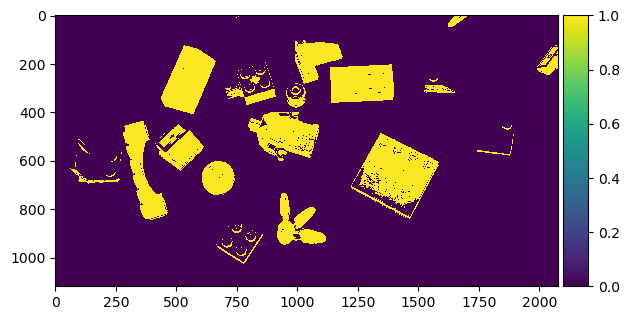

In [41]:
io.imshow(img_temp)

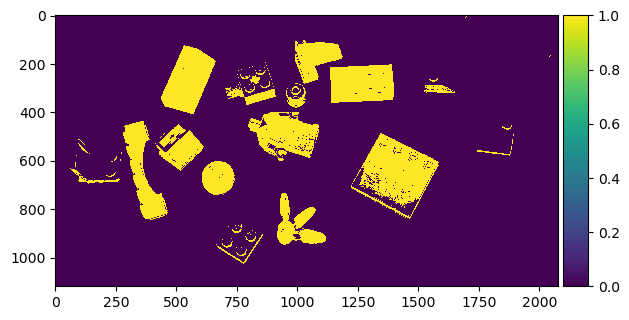

In [42]:
no_border = segmentation.clear_border(img_temp)
io.imshow(no_border)

NameError: name 'im' is not defined

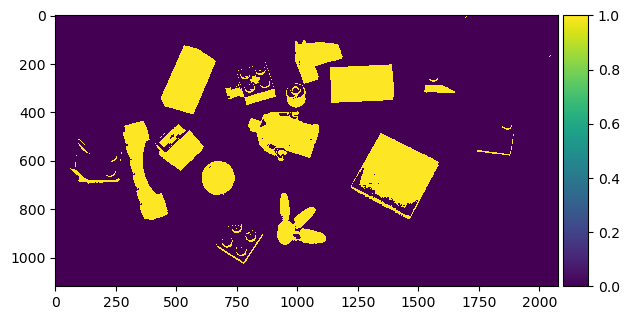

In [53]:
footprint = disk(2)
# Check the size and shape of the structuring element
closed = closing(no_border, footprint)
#io.imshow(closed)
opened = opening(closed, footprint)
im.imshow(opened)

In [56]:
label_img = measure.label(opened)
n_labels = label_img.max()
print(f"Number of labels: {n_labels}")

Number of labels: 44


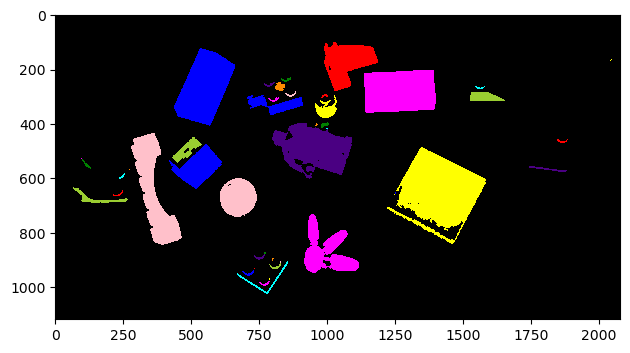

In [59]:
labeled = label2rgb(label_img)
io.imshow(labeled)

In [62]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])
#plt.hist(areas, bins=50)
#plt.show()

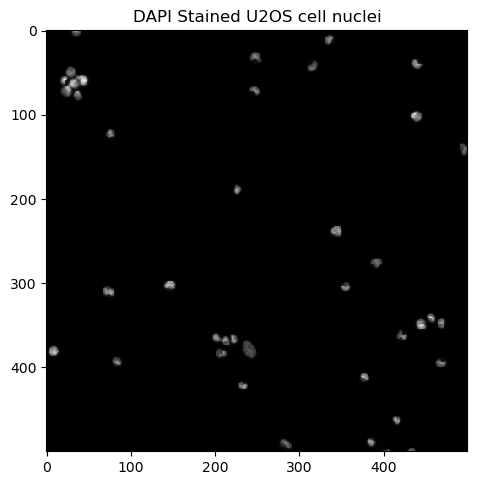

In [64]:
in_dir = "data/"
img_org = io.imread(in_dir + 'Sample E2 - U2OS DAPI channel.tiff')
# slice to extract smaller image
img_small = img_org[700:1200, 900:1400]
img_gray = img_as_ubyte(img_small) 
io.imshow(img_gray, vmin=0, vmax=150)
plt.title('DAPI Stained U2OS cell nuclei')
io.show()

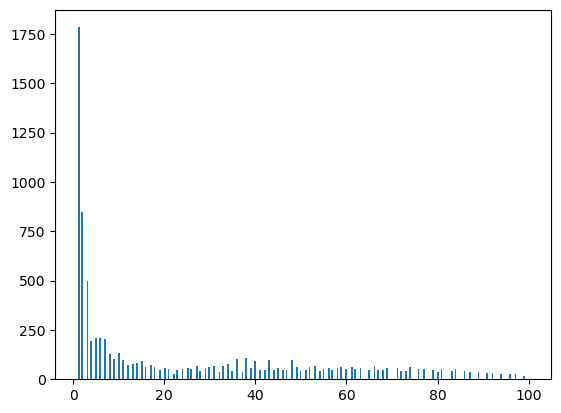

In [65]:
plt.hist(img_gray.ravel(), bins=256, range=(1, 100))
io.show()

/Users/amirbouslama/anaconda3/envs/course02502/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


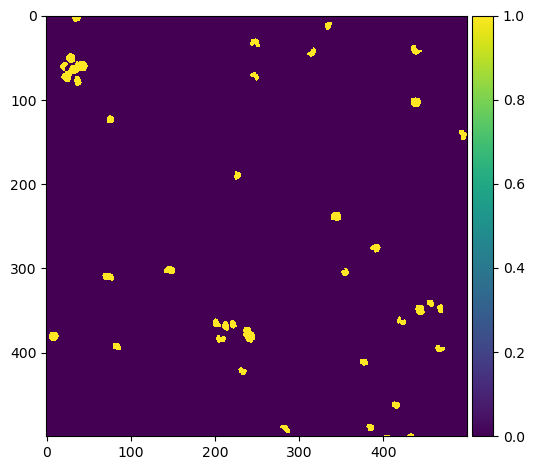

In [73]:
thr = threshold_otsu(img_gray)
img_c_b = np.array([1 if p > thr else 0 for p in img_gray.reshape(img_gray.shape[0]*img_gray.shape[1])]).reshape(img_gray.shape)
io.imshow(img_c_b)

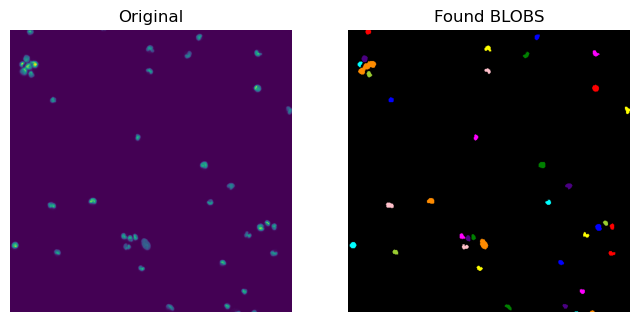

In [90]:
label_img = measure.label(img_c_b)
image_label_overlay = label2rgb(label_img)
show_comparison(img_gray, image_label_overlay, 'Found BLOBS')

In [105]:
region_props = measure.regionprops(label_img)
areas = np.array([prop.area for prop in region_props])

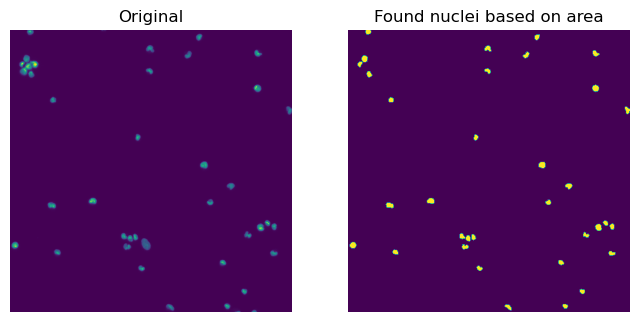

In [106]:
min_area = 50
max_area = 150

# Create a copy of the label_img
label_img_filter = label_img
for region in region_props:
	# Find the areas that do not fit our criteria
	if region.area > max_area or region.area < min_area:
		# set the pixels in the invalid areas to background
		for cords in region.coords:
			label_img_filter[cords[0], cords[1]] = 0
# Create binary image from the filtered label image
i_area = label_img_filter > 0
show_comparison(img_small, i_area, 'Found nuclei based on area')

In [107]:
perimeters = np.array([prop.perimeter for prop in region_props])

In [113]:
circularity = lambda area, perim : 4 * np.pi * area / perim**2

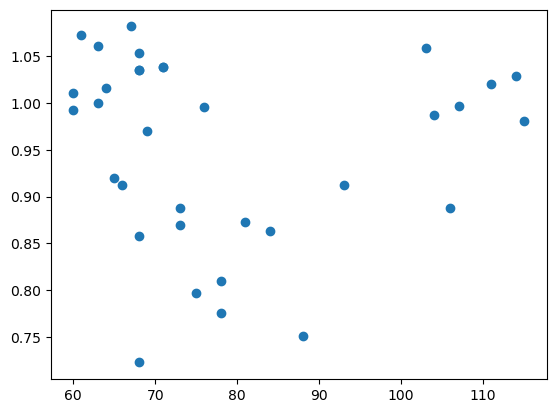

In [118]:
cirs = [circularity(areas[i], perimeters[i]) for i in range(len(perimeters))]
plt.scatter(areas, cirs)